---
<a name='title'></a>
# **<font color="Navy"> Temas Selectos </font>**
## **<font color="RoyalBlue"> Tema 4: Machine Learning </font>**
### **<font color="DodgerBlue"> Notebook 1: Normalización de datos </font>**
#### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2026-I

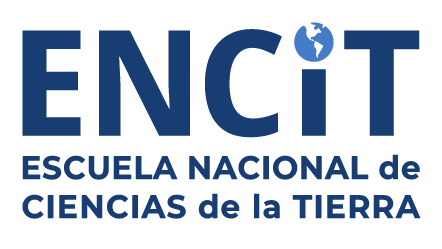

---

### **<font color="ForestGreen"> Introducción a la normalización de datos </font>**


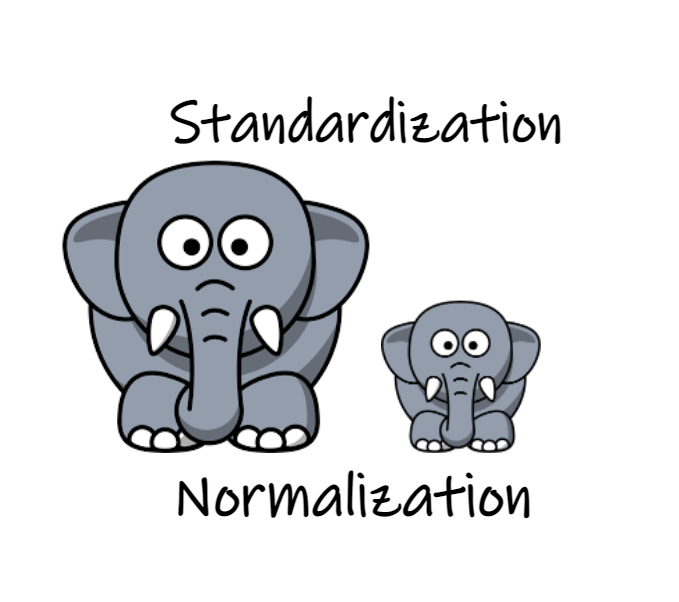

**Normalizar** datos significa transformar sus valores a una escala común sin distorsionar las diferencias en los rangos de valores originales. Sin embargo, este término se usa de manera ambigua en la práctica. En sentido estricto, normalización se refiere *específicamente a reescalar datos* al rango [0, 1] usando los estadísticos de los valores mínimos y máximos (llamado Min-Max scaling), entre otros. Por otro lado, *reescalar* es el término genérico que abarca cualquier transformación que cambie la escala de los datos manteniendo sus propiedades distributivas relativas — incluye tanto normalización como estandarización. 

La **estandarización** (o Z-score normalization) es técnicamente diferente: transforma los datos para que tengan media cero y desviación estándar uno, sin garantizar un rango específico, y es más robusta ante valores atípicos. 

Existe confusión porque muchos usan *"normalización"* como término paraguas para cualquier preprocesamiento de escala, cuando en realidad normalización, estandarización y reescalado son conceptos distintos con propiedades matemáticas específicas. 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
# Datos 1D con outliers (simula mediciones)
rng = np.random.default_rng(42)
x = np.r_[rng.normal(10, 2, 200), [30, 35]]   # dos outliers

Text(0.5, 1.0, 'Datos originales')

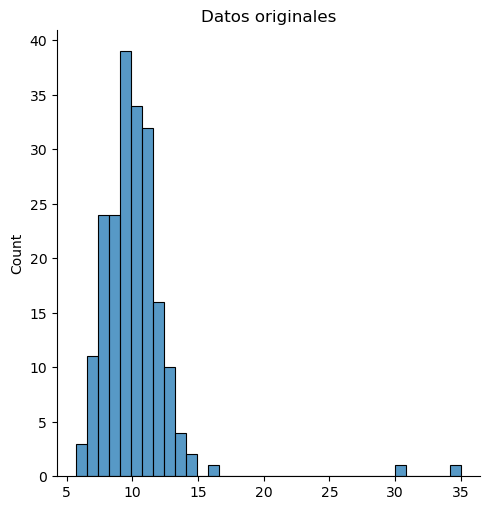

In [12]:
sns.displot(x)
plt.title('Datos originales')

In [8]:
# Estadísticos
x_min, x_max = np.min(x), np.max(x)
x_mean, x_std = np.mean(x), np.std(x)

Usando estos estadísticos podemos usar la versión Min-max para transformar nuestros datos, siguiendo la fórmula: 

\begin{equation}
X_{min,max}\;=\; \frac{x - min(x)}{max(x)-min(x)}
\end{equation}

In [13]:
# Transformaciones
x_minmax = (x - x_min) / (x_max - x_min)     # [0,1]

Text(0.5, 1.0, 'Datos Normalizados')

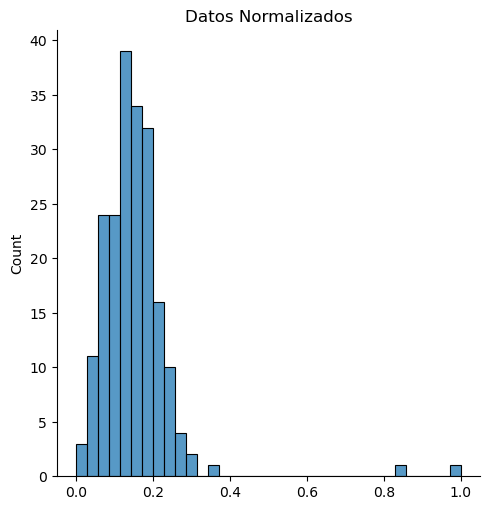

In [14]:
sns.displot(x_minmax)
plt.title('Datos Normalizados')

El Z-score de un valor $x$ se define como:

\begin{equation}
z \;=\; \frac{x - \mu}{\sigma}
\end{equation}

donde $\mu$) es la media y $\sigma$ la desviación estándar.

¿cómo se calcularía el Z-score para nuestros valores anteriores?


Normalizaciones usadas y sus fórmulas (con pros y diferencias)

1) Proporción respecto a la media
   Fórmula:  $x' = \dfrac{x}{\mu}$
   Dónde: $\mu$ es la media del conjunto.
   Ventajas: convierte valores en “veces la media”; útil para índices adimensionales y comparaciones relativas.
   Diferencias: no centra en 0 ni controla la dispersión; sensible a valores atípicos que alteren $\mu$. No usar si $\mu \approx 0$.

2) Max-Abs (escala a [-1, 1])
   Fórmula: $x' = \dfrac{x}{\max(|x|)}$
   Dónde: $\max(|x|)$ es el valor absoluto máximo.
   Ventajas: mantiene la forma de la distribución y la dispersión relativa; útil cuando ya está centrado y se requiere cota simétrica.
   Diferencias: muy sensible a outliers (si hay uno muy grande, comprime el resto); no centra en 0 ni homogeneiza varianza.

3) Normalización L2 (norma unitaria)
   Fórmula: $x' = \dfrac{x}{\|x\|_2}$, con $\|x\|_2 = \sqrt{\sum_i x_i^2}$
   Ventajas: fija la longitud del vector a 1; útil en métodos geométricos (similitud de coseno, modelos que usan productos punto).
   Diferencias: escala global del vector; no centra ni ajusta varianza elemento a elemento; sensible a outliers grandes.

4) Estandarización (Z-score)
   Fórmula: $z = \dfrac{x - \mu}{\sigma}$
   Ventajas: centra en 0 y pone varianza unitaria; apropiada para modelos lineales, regularización y comparación entre variables.
   Diferencias: no limita a un rango fijo; sensible a outliers (mejor usar versiones robustas si hay colas pesadas).



In [15]:
x_overmu = x / (x_mean)                      # proporción respecto a la media
x_maxabs = x / (np.max(np.abs(x)))           # en [-1,1]
x_l2 = x / (np.linalg.norm(x))    
x_zscore = (x - x_mean) / (x_std)

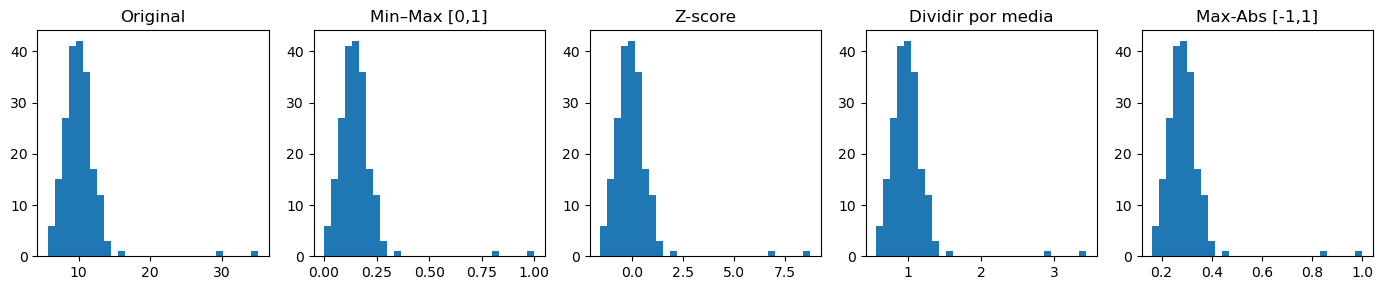

In [16]:
# Visualización comparativa
fig, axes = plt.subplots(1, 5, figsize=(14, 3), sharey=False)
axes[0].hist(x, bins=30)
axes[0].set_title("Original")
axes[1].hist(x_minmax, bins=30)
axes[1].set_title("Min–Max [0,1]")
axes[2].hist(x_zscore, bins=30)
axes[2].set_title("Z-score")
axes[3].hist(x_overmu, bins=30)
axes[3].set_title("Dividir por media")
axes[4].hist(x_maxabs, bins=30)
axes[4].set_title("Max-Abs [-1,1]")
plt.tight_layout()


In [29]:
# --- Malla 2D ---
nx, ny = 200, 200
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

# --- Campo 3D (Z sobre el plano 2D) ---
# combinación de dos “lomas/valle” + ondulación suave
Z = 10*(
    np.exp(-((X-0.30)**2 + (Y-0.40)**2) / 0.02)               # loma 1
    - 0.6*np.exp(-((X-0.75)**2 + (Y-0.70)**2) / 0.01)         # valle
    + 0.15*np.sin(6*np.pi*X)*np.cos(4*np.pi*Y)                # ondulación
)

In [30]:
Zmin, Zmax = Z.min(), Z.max()

In [31]:
# --- Estandarización ---
Z_mu, Z_sd = Z.mean(), Z.std()
Z_z = (Z - Z_mu) / (Z_sd)
Z_scaled = (Z-Zmin)/(Zmax+Zmin)

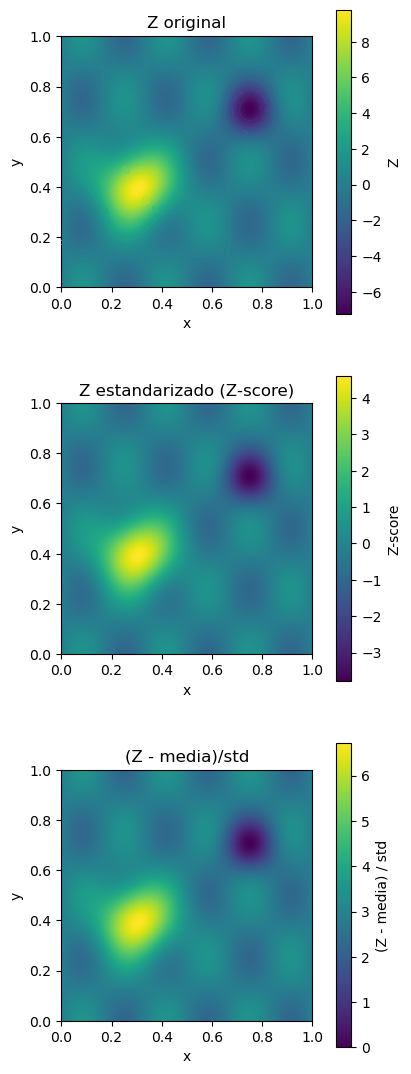

In [35]:
# --- Visualización: original y z-score ---
fig, axs = plt.subplots(3, 1, figsize=(4,11), constrained_layout=True)

im0 = axs[0].imshow(Z, origin="lower", extent=(0,1,0,1), aspect="equal")
axs[0].set_title("Z original")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
plt.colorbar(im0, ax=axs[0], shrink=0.85, label="Z")

# Contornos opcionales para realzar estructura
cs = axs[0].contour(X, Y, Z, levels=10, linewidths=0.8)
axs[0].clabel(cs, inline=True, fontsize=8)

im1 = axs[1].imshow(Z_z, origin="lower", extent=(0,1,0,1), aspect="equal")
axs[1].set_title("Z estandarizado (Z-score)")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
plt.colorbar(im1, ax=axs[1], shrink=0.85, label="Z-score")

im1 = axs[2].imshow(Z_scaled, origin="lower", extent=(0,1,0,1), aspect="equal")
axs[2].set_title("(Z - media)/std")
axs[2].set_xlabel("x")
axs[2].set_ylabel("y")
plt.colorbar(im1, ax=axs[2], shrink=0.85, label="(Z - media) / std")

### **<font color="ForestGreen"> Ejemplo/Ejercicio </font>**

Abrir la base de datos de GPCP, ya sea que ya lo tenga descargado o lo puede descargar via wget a través del link: 'https://downloads.psl.noaa.gov//Datasets/gpcp/precip.mon.mean.nc'. 

1. Leer los datos usando xarray y seleccionando la variable 'precip'.

`ds=xr.open_dataset('/precip.mon.mean.nc')`

2. Calcular los estadísticos necesarios para la normalización ($\mu$, $\sigma$, $min$ y $max$) con respecto al tiempo total y luego con respecto a la coordenada del mes `ds.time.dt.month`.  

`clim=precip.mean('time')`

3. Calcule el promedio por mes de la precipitación usando una operación del tipo 'groupby' y seleccione el mes de su cumpleaños. 

`precip_month=precip.groupby(precip.time.dt.month).mean()`

4. Haga un mapa de la anomalía calculada como la diferencia entre el promedio de su mes de cumpleaños y el promedio climatológico.

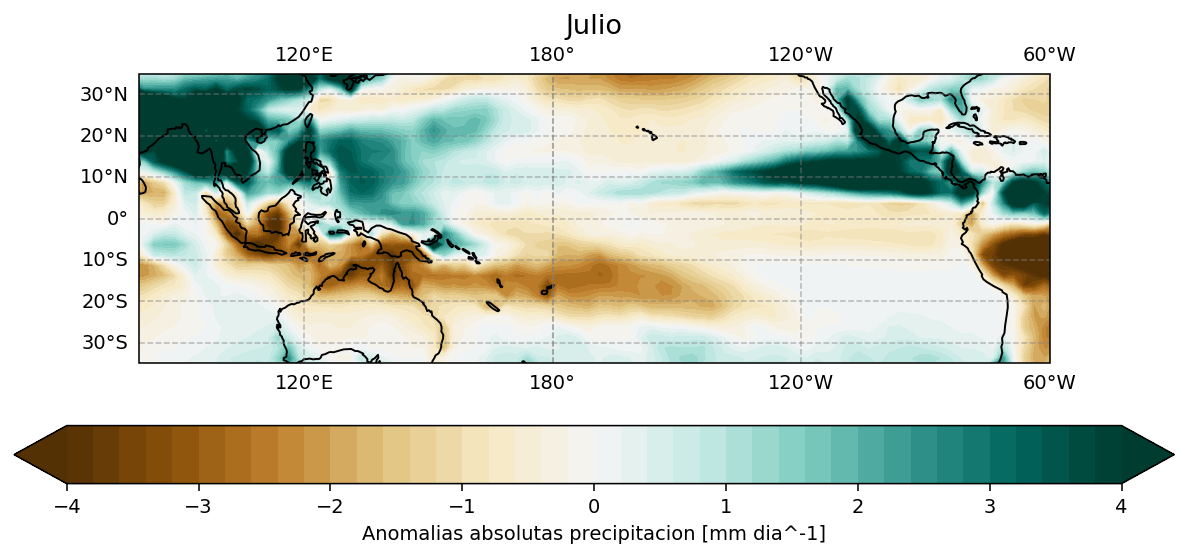

5. Repita para anomalias estandarizadas mediante el Z-score que requiere el promedio climatológico y la desviación estándar que calculó en la parte anterior.

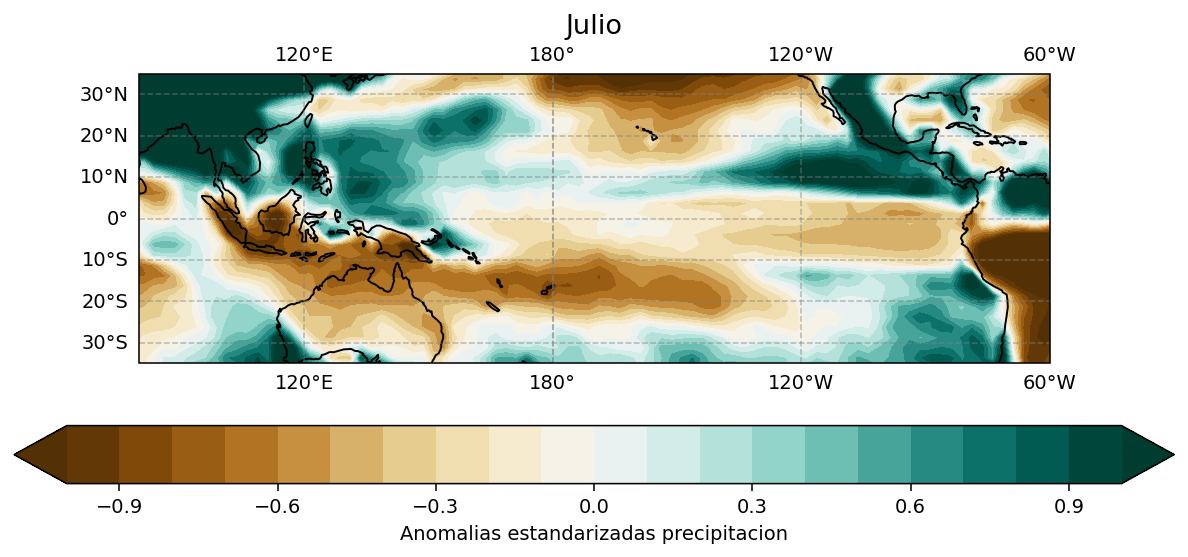


#### **<font color="ForestGreen"> 6. Extra> </font>**
 ¿Cree que puede repetir el ejercicio usando otro tipo de normalización? ¿Puede calcular la anomalía de su mes exacto de cumpleaños? Por ejemplo, el del profe que sería el 1 de julio del año 2000.